# Sommaire <a name=0 ></a>
- [Introduction](#1)
- [I. Analyse des Étapes de Classification Supervisée](#2)
    - [1. Chargement et Préparation des Données](#3)
    - [2. Prétraitement des Images & Extraction des Caractéristiques avec VGG16](#4)
        - [2.1 Entraînement du Modèle de Classification](#5)
        - [2.2 Matrice de Confusion](#6)
        - [2.3 Réduction de Dimensions](#7)
    - [Conclusion](#8)
- [II. Modélisation](#9)
    - [1. Approche Préparation Initiale des Images](#10)
        - [1.1 Création et Entraînement du Modèle](#11)
        - [1.2 Évaluation du Modèle](#12)
    - [2. Approche ImageDatagenerator avec data augmentation](#13)
        - [2.1 Création et Entraînement du Modèle](#14)
        - [2.2 Évaluation du Modèle](#15)
    - [3. Approche nouvelle par Dataset sans data augmentation](#16)
        - [3.1 Création et Entraînement du Modèle](#17)
        - [3.2 Évaluation du Modèle](#18)
    - [4. Approche nouvelle par Dataset avec data augmentation intégrée au modèle](#19)
        - [4.1 Création et Entraînement du Modèle](#20)
        - [4.2 Évaluation du Modèle](#21)
- [Conclusion](#22)

# Introduction<a name=1 ></a>

Dans le cadre de la classification d'images, les réseaux de neurones convolutionnels (CNN) sont devenus une norme pour traiter des données visuelles complexes, grâce à leur capacité à extraire automatiquement des caractéristiques des images. Ces modèles ont révolutionné des domaines tels que la reconnaissance d'objets, la détection de visages et la segmentation d'images, en surpassant largement les approches traditionnelles de machine learning basées sur l'extraction manuelle de caractéristiques. Parmi les architectures CNN populaires, le modèle VGG16 s'est imposé comme une référence en raison de sa simplicité et de son efficacité.

Ce projet vise à explorer différentes approches pour la classification d'images en utilisant des CNN et l'architecture VGG16, pré-entraînée sur le dataset ImageNet, afin de bénéficier des caractéristiques apprises sur un vaste corpus d'images. L'objectif est de comparer plusieurs techniques pour entraîner des modèles de classification d'images tout en cherchant à améliorer la précision de validation et la généralisation, c'est-à-dire la capacité du modèle à bien prédire sur des images non vues auparavant.

Pour cela, nous allons étudier quatre approches distinctes :
- Approche par préparation initiale des images : Cette méthode consiste à utiliser des images prétraitées et à les passer directement au modèle, sans modification supplémentaire.
- Approche avec ImageDataGenerator et augmentation de données : Dans cette approche, l'augmentation des données, c’est-à-dire la génération artificielle de nouvelles images à partir d’images existantes, est utilisée pour enrichir le dataset d'entraînement et aider le modèle à généraliser.
- Approche par Dataset sans augmentation : Ici, un nouveau pipeline est utilisé pour charger les données directement sans effectuer d'augmentation, en se concentrant uniquement sur la qualité des images originales.
- Approche par Dataset avec augmentation intégrée au modèle : Dans cette approche, l'augmentation des données est intégrée directement dans le modèle via des couches de transformation d'images, ce qui permet de générer de nouvelles images au cours de l'entraînement.

Ces différentes approches seront comparées en termes de précision, de perte et de capacité de généralisation afin de déterminer la méthode la plus efficace pour notre tâche de classification d'images. Dans les sections qui suivent, nous décrirons en détail le processus de préparation des données, la création des modèles, leur entraînement, et l'analyse des résultats obtenus pour chacune des approches.

# I. Analyse des Étapes de Classification Supervisée<a name=2 ></a>

Dans cette section, nous nous concentrons sur la première phase essentielle du processus de classification d'images : le prétraitement des données et l'extraction de caractéristiques. Afin d'optimiser l'entraînement du modèle de classification, il est nécessaire d'adopter une approche structurée, consistant à normaliser et à transformer les images d'entrée, ainsi qu'à extraire des caractéristiques visuelles pertinentes à partir de celles-ci.

L'architecture VGG16, un réseau de neurones convolutionnels pré-entraîné, est couramment utilisée pour cette tâche, en raison de sa capacité à extraire des caractéristiques puissantes à partir de n'importe quel ensemble d'images. Comme dans notre précédent notebook, nous avons utilisé VGG16 sans inclure sa partie finale dédiée à la classification, de manière à utiliser ses couches convolutives uniquement pour l'extraction de caractéristiques. Cette méthode permet d'obtenir des représentations riches et compactes des images, qui serviront de base pour l'entraînement de modèles de classification plus simples, tels que la régression logistique.

Une fois ces caractéristiques extraites, nous analysons les performances du modèle de classification grâce à plusieurs indicateurs et techniques d'évaluation, à savoir :

- Régression logistique : Un modèle de classification linéaire simple mais efficace, utilisé ici pour évaluer les performances des caractéristiques extraites. Ce modèle permet de donner une première indication de la capacité des caractéristiques à distinguer correctement les classes.
- Réduction de dimension avec PCA (Principal Component Analysis) : La PCA est une technique statistique qui permet de réduire la dimensionnalité des données en projetant les caractéristiques sur un espace de plus petite dimension. Cela permet de mieux visualiser la répartition des classes et d'analyser si les caractéristiques extraites permettent une bonne séparation entre les différentes catégories.
- Réduction de dimension avec t-SNE (t-Distributed Stochastic Neighbor Embedding) : Contrairement à la PCA, t-SNE est une technique non-linéaire qui permet de représenter les données dans un espace de faible dimension tout en préservant les relations de proximité entre les points. Cette méthode est utile pour visualiser les clusters d’images et détecter les éventuels chevauchements entre les classes.

Ces différentes étapes permettent de comprendre dans quelle mesure les caractéristiques extraites avec VGG16 sont pertinentes pour la classification, tout en donnant des premières indications sur la complexité du problème et la capacité du modèle à généraliser.

Dans les sous-parties suivantes, nous détaillerons le processus de prétraitement des images, l'extraction des caractéristiques avec VGG16, ainsi que l'application des techniques de réduction de dimension pour la visualisation des données.

## 1. Chargement et Préparation des Données<a name=3 ></a>

Avant de modéliser, il est crucial d'explorer les données d'images pour mieux comprendre leur structure et distribution. Ici, nous utilisons un jeu de données provenant de Flipkart, une plateforme e-commerce. L'objectif est d'extraire les images de produits et de les regrouper par catégorie principale.

Nous commençons par nettoyer et formater les données pour isoler les catégories de produits, puis nous créons une fonction qui liste les images associées à chaque catégorie. Enfin, nous visualisons un échantillon d'images par catégorie pour évaluer leur diversité et vérifier la cohérence des données avant l'entraînement des modèles.

Home Furnishing


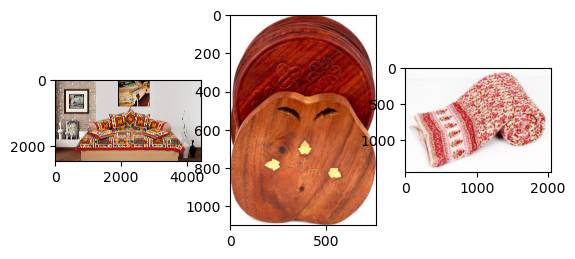

Baby Care


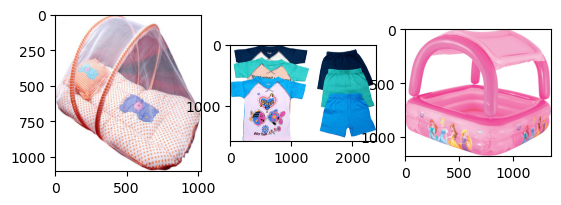

Watches


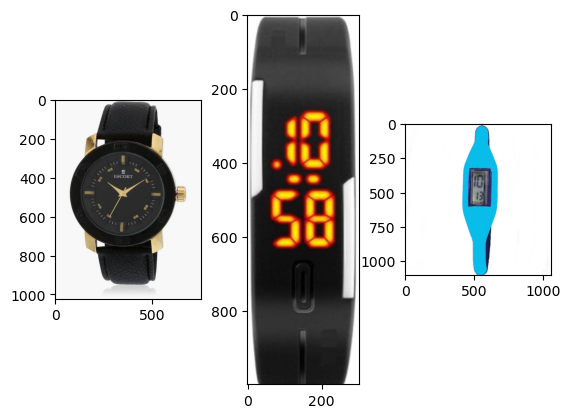

Home Decor & Festive Needs


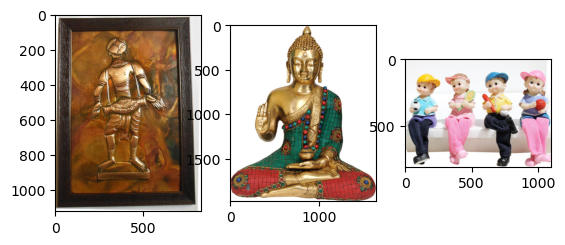

Kitchen & Dining


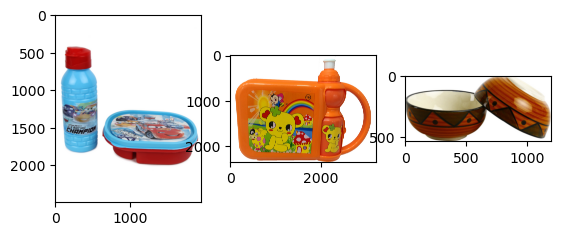

Beauty and Personal Care


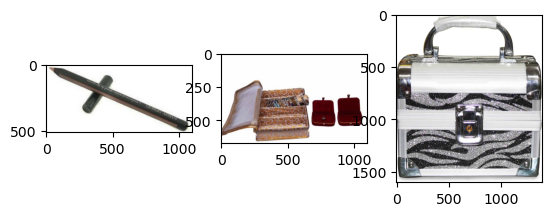

Computers


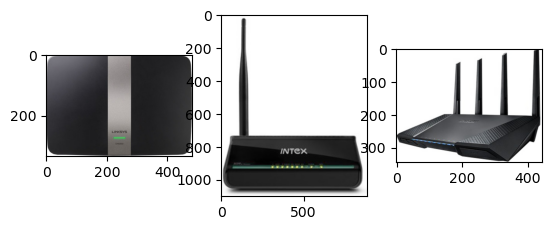

In [1]:
import pandas as pd
from matplotlib.image import imread
import matplotlib.pyplot as plt

# Chargement des données
flipkart = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

# Extraction de la catégorie du produit
flipkart.loc[:, 'product_category'] = flipkart['product_category_tree'].apply(lambda x: x.split(' >> ')[0])
flipkart.loc[:, 'product_category'] = flipkart['product_category'].str.strip('["')

# Chemin vers les images
path = "Images/"
list_photos = list(flipkart['image'])

# Fonction pour lister les images d'une catégorie donnée
def list_fct(name) :
    list_image_name = [list_photos[i] for i in range(len(flipkart)) if flipkart["product_category"][i]==name]
    return list_image_name

# Affichage des images par catégorie
for name in list(flipkart['product_category'].unique()) :
    print(name)
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path + list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

Après avoir exploré visuellement quelques exemples d'images classées par catégories, l'étape suivante cruciale consiste à prétraiter ces images de manière cohérente afin de les préparer pour l'extraction des caractéristiques et l'entraînement des modèles. Le prétraitement des images est une phase clé dans tout projet de classification d'images, car il garantit que les images fournies au modèle sont normalisées et optimisées pour de meilleures performances en termes d'apprentissage.

## 2. Prétraitement des Images & Extraction des Caractéristiques avec VGG16<a name=4 ></a>

Dans cette étape, nous appliquons plusieurs techniques de prétraitement : tout d'abord, les images sont converties en niveaux de gris afin de réduire la complexité des données tout en conservant les informations essentielles. Elles sont ensuite redimensionnées à une taille uniforme de 224x224 pixels, ce qui est la dimension d'entrée standard pour les modèles VGG16. Après cela, nous utilisons l'égalisation d'histogramme pour améliorer le contraste des images, en ajustant la luminosité de façon à rendre les détails plus visibles, notamment dans les zones d'ombres ou de lumière. Enfin, un flou gaussien est appliqué pour lisser les images et atténuer le bruit, ce qui facilite l'extraction des caractéristiques essentielles par le modèle.

Une fois les images prétraitées, nous utilisons le modèle VGG16, pré-entraîné sur ImageNet, pour extraire les caractéristiques. Cependant, au lieu d'utiliser l'ensemble complet du modèle, nous supprimons la dernière couche de classification et conservons les couches qui fournissent une représentation riche des caractéristiques visuelles. Cette technique permet d’obtenir des représentations de haut niveau des images, qui peuvent ensuite être utilisées pour l’entraînement de nouveaux classificateurs ou pour une analyse plus approfondie.

In [2]:
import cv2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

def preprocess_image(image):
    """
    Prend en entrée le nom d'une image, applique une série de traitements d'image
    tels que la conversion en niveaux de gris, le redimensionnement, l'histogramme égalisé,
    et un flou gaussien, puis renvoie l'image prétraitée.
    """
    image = cv2.imread(path + image, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (224, 224))
    image = cv2.equalizeHist(image)
    image = cv2.GaussianBlur(image, (5, 5), 0)
    return image

# Application du prétraitement sur les images du DataFrame
flipkart['processed_image'] = flipkart['image'].apply(preprocess_image)

# Chargement du modèle VGG16 et extraction des caractéristiques
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

# Affichage du résumé du modèle
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


Après avoir extrait les caractéristiques des images à l'aide du modèle VGG16, la prochaine étape consiste à utiliser ces caractéristiques pour construire un modèle de classification. Le but est de former un modèle capable de prédire la catégorie de produit à partir de ces caractéristiques extraites.

### 2.1 Entraînement du Modèle de Classification<a name=5 ></a>

Dans ce cadre, nous allons utiliser une régression logistique, qui est un modèle de classification supervisé. Ce modèle prend en entrée les caractéristiques des images extraites par VGG16 et tente de trouver la meilleure fonction qui associe ces caractéristiques aux catégories de produits. La régression logistique est un modèle linéaire souvent utilisé pour des problèmes de classification multicatégorie. Ici, nous l’appliquons aux caractéristiques haute dimension obtenues à partir du modèle pré-entraîné.

Avant de procéder à l'entraînement du modèle de régression logistique, nous divisons les données en un ensemble d'entraînement et un ensemble de test. Cela permet d'évaluer la performance du modèle sur des données qu'il n'a jamais vues, garantissant ainsi une meilleure généralisation.

Ensuite, nous utilisons les caractéristiques prétraitées pour former la régression logistique et, après l'entraînement, nous évaluons la performance du modèle sur l'ensemble de test. Nous mesurerons la précision du modèle ainsi que d'autres métriques pertinentes, telles que le rapport de classification, qui fournit des informations détaillées sur les performances par catégorie.

In [3]:
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Liste pour stocker les caractéristiques extraites par VGG16
im_features_vgg = []

# Boucle pour prétraiter les images et extraire les caractéristiques avec VGG16
for image in flipkart['processed_image']:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    im_features_vgg.append(model.predict(image, verbose=0)[0])

# Conversion des caractéristiques en tableau NumPy
im_features_vgg = np.asarray(im_features_vgg)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(im_features_vgg, flipkart['product_category'], test_size=0.2, 
                                                    random_state=42)

# Modèle de régression logistique
model = LogisticRegression()
# Entraînement du modèle
model.fit(X_train, y_train)
# Prédiction des catégories sur l'ensemble de test
y_pred = model.predict(X_test)

# Affichage de la forme des caractéristiques et des métriques de performance
print(im_features_vgg.shape)
print()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

(1050, 4096)

Accuracy: 0.8333333333333334

Classification Report:
                            precision    recall  f1-score   support

                 Baby Care       0.68      0.70      0.69        27
  Beauty and Personal Care       0.94      0.81      0.87        21
                 Computers       0.82      0.95      0.88        38
Home Decor & Festive Needs       0.78      0.83      0.81        30
           Home Furnishing       0.81      0.71      0.76        35
          Kitchen & Dining       0.88      0.81      0.84        26
                   Watches       0.97      0.97      0.97        33

                  accuracy                           0.83       210
                 macro avg       0.84      0.83      0.83       210
              weighted avg       0.84      0.83      0.83       210



C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Les résultats de la régression logistique, après extraction des caractéristiques via VGG16, montrent une précision globale de 83,3%, indiquant une bonne capacité du modèle à classer les produits d'après leurs images.

Le rapport de classification révèle des performances variées selon les catégories. Par exemple, "Watches" se distingue avec une précision et un rappel de 97%, tandis que "Baby Care" obtient des résultats plus modestes (précision de 68%). Ces écarts peuvent être dus à des différences dans la diversité des images ou la taille de l'échantillon pour chaque catégorie.

### 2.2 Matrice de Confusion<a name=6 ></a>

Afin de visualiser plus clairement les performances du modèle, nous allons maintenant générer une matrice de confusion. Cette matrice permet de visualiser les erreurs de classification du modèle, en montrant pour chaque classe le nombre d'exemples correctement ou incorrectement classés. Cela nous donnera une vision plus détaillée des erreurs du modèle et des catégories les plus souvent confondues.

<Axes: >

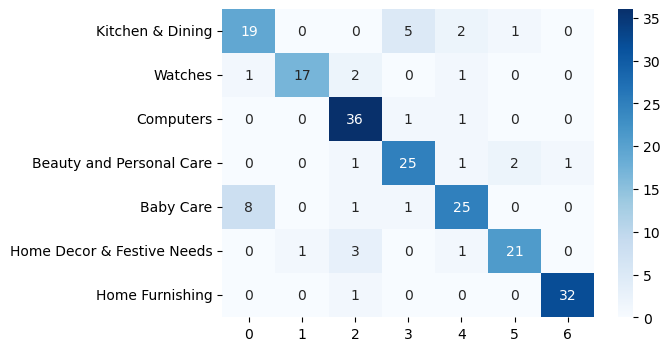

In [4]:
from sklearn import metrics
import seaborn as sns

# Liste des étiquettes uniques des catégories de produits
list_labels = list(set(flipkart['product_category']))

# Matrice de confusion
conf_mat = metrics.confusion_matrix(y_test, y_pred)
# Création d'un DataFrame à partir de la matrice de confusion
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels], columns = [i for i in "0123456"])

# Affichage de la heatmap pour la matrice de confusion
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

La matrice de confusion a fourni une vue d'ensemble précieuse sur les performances de notre modèle de classification. En effet, les chiffres significatifs alignés sur la diagonale indiquent que la plupart des prédictions ont été correctement classées, illustrant ainsi une bonne capacité du modèle à discriminer entre les différentes catégories de produits. Cependant, des valeurs élevées hors de la diagonale, telles que le 8 dans la catégorie "Baby Care" et le 5 pour "Kitchen & Dining", suggèrent des confusions notables qui constituent une certaine marge de progression pour le modèle.

Ces erreurs peuvent être attribuées à plusieurs facteurs, notamment à des similarités visuelles entre certaines catégories de produits, qui pourraient nécessiter une meilleure distinction dans les caractéristiques d'image utilisées pour l'entraînement du modèle. Par exemple, il est possible que des produits de la catégorie "Baby Care" partagent des motifs ou des couleurs similaires avec d'autres catégories, ce qui entraîne des difficultés de classification.

### 2.3 Réduction de Dimensions<a name=7 ></a>

Pour mieux comprendre la répartition des données et les relations entre les différentes catégories de produits, nous allons procéder à une réduction de dimensions à l'aide de l'analyse en composantes principales (PCA). Cette technique nous permettra de visualiser les caractéristiques des images en deux dimensions, tout en conservant la variabilité des données. La représentation graphique qui en résultera facilitera l’identification des clusters naturels de produits et des éventuelles superpositions entre les catégories, offrant ainsi une perspective plus claire sur les performances de notre modèle et les domaines nécessitant des améliorations.

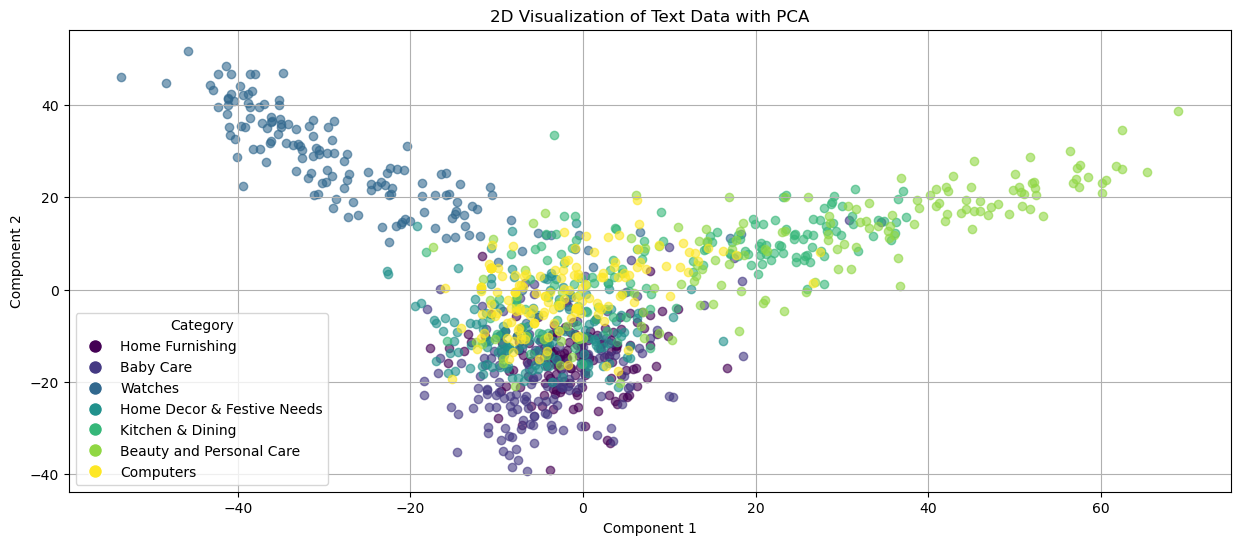

In [5]:
from sklearn.decomposition import PCA
import matplotlib.lines as mlines

# Réduction de dimensionnalité avec PCA (de 4096 à 2 composantes)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(im_features_vgg)

# Création d'un DataFrame pour les deux composantes principales
reduced_df = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2'])
reduced_df['category'] = flipkart['product_category']

# Récupération des catégories uniques
categories = reduced_df['category'].unique()

# Création d'une colormap pour les différentes catégories
cmap = plt.get_cmap('viridis', 7)
color_dict = {cat: cmap(i) for i, cat in enumerate(categories)}

# Création de la figure pour la visualisation
plt.figure(figsize=(15, 6))

# Boucle pour afficher chaque catégorie avec une couleur différente
for category in categories:
    subset = reduced_df[reduced_df['category'] == category]
    plt.scatter(subset['Component 1'], subset['Component 2'], color=color_dict[category], label=category, alpha=0.6)
    
# Création de la légende pour les catégories
handles = [mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[cat], markersize=10, 
                         label=cat) for cat in categories]

# Ajout de la légende, des labels et du titre
plt.legend(handles=handles, title='Category')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Visualization of Text Data with PCA')
plt.grid()

# Affichage de la figure
plt.show()

La réduction de dimensions par PCA nous a permis d'obtenir une première visualisation des données, illustrant comment les différentes catégories de produits sont réparties dans l'espace réduit. Cependant, cette approche ne prend pas toujours en compte la structure locale des données, ce qui peut être crucial pour des tâches de classification. Pour cela, nous allons appliquer une technique plus avancée : le t-SNE (t-distributed Stochastic Neighbor Embedding).

Le t-SNE est particulièrement efficace pour conserver les relations locales, ce qui signifie qu'il est capable de préserver les similarités entre les points de données voisins. Cela le rend idéal pour la visualisation des caractéristiques complexes extraites par le modèle VGG16. En combinant le t-SNE avec le clustering K-Means, nous serons en mesure d'explorer les regroupements naturels parmi les données d'images traitées.

Nous commencerons par encoder les catégories de produits en nombres pour faciliter le processus de clustering. Ensuite, le t-SNE nous fournira une représentation 2D des caractéristiques d'image, que nous pourrons ensuite utiliser pour appliquer l'algorithme K-Means afin de segmenter les images en clusters distincts. Enfin, nous évaluerons l'efficacité du clustering en utilisant le score ARI (Adjusted Rand Index), qui nous donnera une indication de la qualité de nos regroupements par rapport aux catégories réelles des produits. Cette approche visuelle et analytique nous aidera à mieux comprendre comment les différentes catégories se comparent et où des améliorations peuvent être apportées dans notre modèle de classification.

C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI score :  0.4192


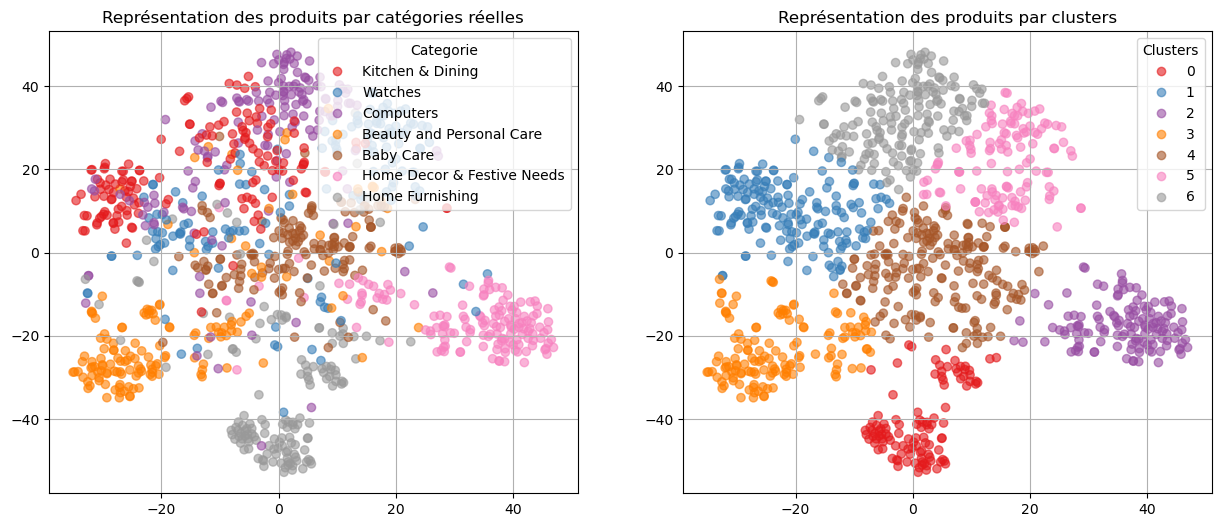

In [6]:
from sklearn import manifold
from sklearn import cluster, metrics

# Liste des catégories uniques
l_cat = list(set(flipkart['product_category']))
# Conversion des catégories en valeurs numériques
y_cat_num = [(1-l_cat.index(flipkart.iloc[i]['product_category'])) for i in range(len(flipkart))]

# TSNE pour la réduction de la dimensionnalité à 2 composantes
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(im_features_vgg)

# Clustering avec KMeans en 7 clusters
cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)
cls.fit(X_tsne)

# Calcul de l'ARI (Adjusted Rand Index) pour évaluer le clustering
ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
print("ARI score : ", ARI)

# Visualisation des résultats
fig = plt.figure(figsize=(15,6))

# Représentation des produits par catégories réelles (premier graphique)
ax = fig.add_subplot(121)
scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1', alpha=0.6)
ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
plt.title('Représentation des produits par catégories réelles')
plt.grid()

# Représentation des produits par clusters (deuxième graphique)
ax = fig.add_subplot(122)
scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=cls.labels_, cmap='Set1', alpha=0.6)
ax.legend(handles=scatter.legend_elements()[0], labels=set(cls.labels_), loc="best", title="Clusters")
plt.title('Représentation des produits par clusters')
plt.grid()

# Affichage de la figure
plt.show()

Les résultats générés indiquent une corrélation modérée entre les catégories de produits réelles et les clusters identifiés par l'algorithme K-Means. Bien que ce résultat suggère qu'il existe une certaine structure dans les données, il révèle également que notre modèle de clustering n'est pas encore suffisamment performant pour capturer pleinement les nuances des différentes catégories de produits. En examinant les deux graphiques générés, on peut observer que certains clusters se chevauchent de manière significative, ce qui pourrait entraîner des confusions lors de la classification.

Cette situation nous pousse à explorer des méthodes plus sophistiquées pour améliorer la capacité de notre modèle à classifier les images de manière plus précise.

## Conclusion<a name=8 ></a>

L'analyse approfondie de notre ensemble de données d'images a permis de tirer des enseignements significatifs sur la classification des produits. En examinant les performances des différentes approches de prétraitement d'images et d'apprentissage automatique, nous avons constaté des variations notables dans les résultats. L'utilisation du modèle VGG16 a montré un potentiel prometteur pour extraire des caractéristiques pertinentes, cependant, l'évaluation de performance que nous avons effectué souligne que des améliorations sont nécessaires pour renforcer la capacité de classification.

Pour aller au-delà de ces résultats initiaux, nous entrons maintenant dans la phase de modélisation. Cette étape sera cruciale pour développer des modèles de classification plus robustes et efficaces. En effet, nous allons implémenter une approche systématique pour préparer nos images, en optimisant leur qualité et en les adaptant aux exigences du modèle VGG16. Cette préparation initiale des images inclura des techniques de normalisation et d'augmentation des données afin d'améliorer la généralisation du modèle.

# II. Modélisation<a name=9 ></a>

Nous entrons maintenant dans la phase de modélisation, qui sera cruciale pour développer des modèles de classification plus robustes et efficaces. Cette étape implique l'implémentation d'une approche systématique pour préparer nos images, en optimisant leur qualité et en les adaptant aux exigences du modèle VGG16. 

Nous entrons maintenant dans la phase de modélisation, qui est cruciale pour développer des modèles de classification robustes et efficaces. Cette étape implique l'implémentation d'une approche systématique pour préparer nos images, en optimisant leur qualité et en les adaptant aux exigences du modèle VGG16. Cette préparation initiale des images inclura des techniques de normalisation et d'augmentation des données afin d'améliorer la généralisation du modèle.

Pour ce faire, nous suivrons un plan en plusieurs étapes :
- Approche Préparation Initiale des Images : Dans cette section, nous aborderons les techniques de prétraitement des images, telles que la normalisation et le redimensionnement, afin de garantir qu'elles soient dans un format optimal pour l'apprentissage.
- Approche ImageDataGenerator avec Data Augmentation : Nous explorerons l'utilisation de la classe ImageDataGenerator pour effectuer des transformations d'augmentation des données, ce qui permet d'enrichir notre ensemble d'apprentissage et d'améliorer la robustesse du modèle.
- Approche Nouvelle par Dataset sans Data Augmentation : Dans cette partie, nous examinerons une méthode qui utilise directement un ensemble de données sans appliquer d'augmentation, afin de comparer les performances avec l'approche précédente.
- Approche Nouvelle par Dataset avec Data Augmentation Intégrée au Modèle : Enfin, nous introduirons une approche innovante où l'augmentation des données est intégrée directement dans le modèle, permettant ainsi une flexibilité et une efficacité accrues lors de l'entraînement.

Cette structure nous permettra d'évaluer différentes stratégies de préparation et d'augmentation des données, en identifiant celle qui offre la meilleure performance pour notre tâche de classification.

## 1. Approche Préparation Initiale des Images<a name=10 ></a>

Dans cette sous-partie, nous allons nous concentrer sur le prétraitement des images avant leur introduction dans le modèle VGG16. Ce prétraitement est essentiel pour garantir que les images soient dans un format optimal pour l'apprentissage. Nous allons normaliser les images, ajuster leur taille pour qu'elles correspondent à la forme d'entrée du modèle, et appliquer d'autres transformations nécessaires pour améliorer leur qualité. L'objectif est de maximiser l'extraction des caractéristiques pertinentes et d'augmenter la robustesse du modèle lors de l'entraînement.

In [7]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

def create_model_fct() :
    """
    Crée un modèle basé sur l'architecture VGG16 avec des couches additionnelles pour la classification.
    Les couches de VGG16 sont gelées, et des couches de global average pooling, dense, et dropout
    sont ajoutées avant la couche de prédiction.
    """

    # Chargement du modèle VGG16 pré-entraîné sur ImageNet sans les couches de classification (include_top=False)
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Geler les couches de VGG16 pour ne pas les entraîner
    for layer in model0.layers:
        layer.trainable = False

    # Ajout des couches de classification personnalisées
    x = model0.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Création du modèle final
    model = Model(inputs=model0.input, outputs=predictions)
    # Compilation du modèle
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])
    # Affichage du résumé du modèle
    print(model.summary())    
    return model

# Entraînement du modèle sur GPU
with tf.device('/gpu:0'): 
    model1 = create_model_fct()

# Définition des callbacks pour l'entraînement
checkpoint = ModelCheckpoint("./model1_best_weights.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Liste des callbacks
callbacks_list = [checkpoint, es]

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


Le modèle de classification développé repose sur l'architecture VGG16 pré-entraînée, offrant une base solide pour la reconnaissance d'images. En intégrant une couche de pooling global, suivie de couches denses avec une activation ReLU et une couche de dropout pour réduire le surapprentissage, nous avons constitué un modèle capable de classer les images en sept catégories de produits.

Avec un total de 14,847,815 paramètres, dont 133,127 sont ajustables, le modèle est bien calibré pour une tâche de classification tout en bénéficiant de la puissance de transfert d'apprentissage. Le résumé du modèle indique également que la majorité des paramètres sont non ajustables, résultant de l'utilisation de VGG16 en mode "non entraînable". Cela permet de capitaliser sur les caractéristiques d'extraction d'images préalablement apprises, tout en gardant une capacité d'apprentissage efficace sur nos classes spécifiques.

### 1.1 Création et Entraînement du Modèle<a name=11 ></a>

Nous allons maintenant préparer nos données d'entrée. Cela inclut l'encodage des labels, le chargement et le prétraitement des images, ainsi que la séparation des données en ensembles d'entraînement et de validation. Cette étape est cruciale pour garantir que notre modèle reçoit des données correctement formatées, maximisant ainsi ses chances d'apprentissage efficace.

In [8]:
from sklearn import preprocessing
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

# Initialisation de LabelEncoder pour encoder les catégories de produits
le = preprocessing.LabelEncoder()
le.fit(flipkart["product_category"])
flipkart["label"] = le.transform(flipkart["product_category"])

# Conversion des étiquettes en format one-hot encoding
y = to_categorical(flipkart["label"])

# Préparation des images
prepared_images = []
for image_num in range(len(flipkart['image'])) :
    
    # Chargement et redimensionnement des images
    img = (load_img(path + flipkart['image'][image_num],target_size=(224, 224)))
    img = img_to_array(img)

    # Reshape de l'image (même si ici c'est redondant avec img_to_array)
    img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
    # Prétraitement de l'image (normalisation pour VGG16)
    img = preprocess_input(img)
    # Ajout de l'image prétraitée à la liste
    prepared_images.append(img)

# Conversion de la liste d'images en tableau NumPy
images_np = np.array(prepared_images)

# Division des données en ensemble d'entraînement et ensemble de validation
X_train, X_val, y_train, y_val = train_test_split(images_np, y, stratify=y, test_size=0.25, random_state=42)

# Entraînement du modèle sur GPU avec les données d'entraînement et validation
with tf.device('/gpu:0'): 
    history1 = model1.fit(X_train, y_train, epochs=50, batch_size=64, callbacks=callbacks_list, validation_data = (X_val,
                                                                                                                   y_val), 
                          verbose=1)

C:\Users\Alex-\anaconda3\lib\site-packages\PIL\Image.py:3186: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.3553 - loss: 8.1569 
Epoch 1: val_loss improved from inf to 1.69579, saving model to ./model1_best_weights.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 241s 18s/step - accuracy: 0.3641 - loss: 7.9651 - val_accuracy: 0.7414 - val_loss: 1.6958
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.6918 - loss: 2.1738 
Epoch 2: val_loss improved from 1.69579 to 1.29054, saving model to ./model1_best_weights.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 238s 18s/step - accuracy: 0.6920 - loss: 2.1714 - val_accuracy: 0.7529 - val_loss: 1.2905
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.7479 - loss: 1.1986 
Epoch 3: val_loss improved from 1.29054 to 1.18379, saving model to ./model1_best_weights.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 243s 19s/step - accuracy: 0.7484 - loss: 1.1943 - val_accuracy: 0.7909 - val_loss: 1.1838
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.7716 - loss: 1.0306 
Epoch 4: val_loss improve

Les résultats de l'entraînement montrent une progression significative de la performance du modèle au fil des époques. Au terme des 11 époques, le modèle a atteint une précision d'entraînement de 94.76% et une précision de validation de 82.51%. Ce processus d'apprentissage a été ponctué par des améliorations notables de la perte de validation, culminant à une valeur de 0.89858 au cours des six premières époques. La régularisation a permis de prévenir le surapprentissage, comme en témoigne l'absence d'amélioration des performances de validation après la sixième époque, entraînant l'arrêt précoce de l'entraînement.

### 1.2 Évaluation du Modèle<a name=12 ></a>

Ces résultats indiquent que le modèle est capable de généraliser relativement bien sur des données non vues, bien qu'il subsiste un certain écart entre les précisions d'entraînement et de validation. Pour évaluer plus en profondeur les performances du modèle, nous allons procéder à une analyse détaillée incluant une matrice de confusion et des graphiques de suivi de l'historique d'entraînement. Ces outils permettront de mieux comprendre où se situent les forces et les faiblesses du modèle, et d'identifier d'éventuelles améliorations à apporter.

25/25 ━━━━━━━━━━━━━━━━━━━━ 167s 7s/step - accuracy: 0.9869 - loss: 0.0280
Training Accuracy :  0.9911
9/9 ━━━━━━━━━━━━━━━━━━━━ 53s 6s/step - accuracy: 0.8073 - loss: 1.0378
Validation Accuracy :  0.8023

Optimized Validation Accuracy :  0.7643


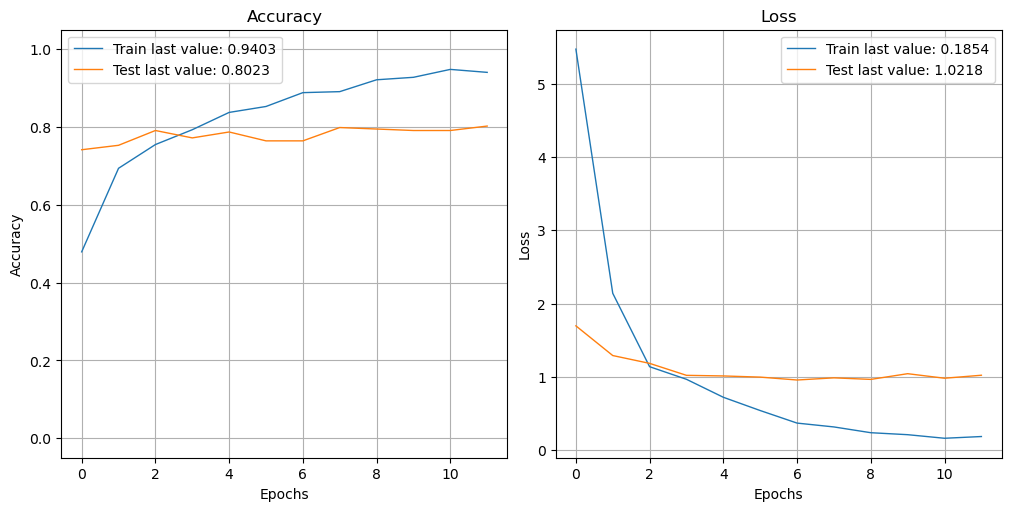

9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step


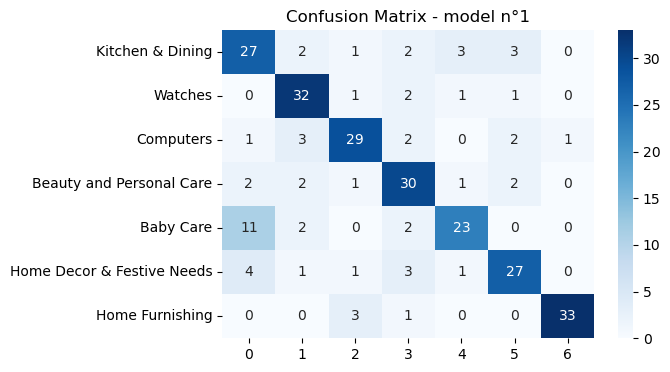

In [9]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

# Conversion des étiquettes de validation en format numérique
y_val_num = np.argmax(y_val, axis=1)

def evaluate_and_visualize_model(model_number, train_X, train_y, val_X, val_y):
    """
    Évalue le modèle spécifié et visualise les résultats, y compris l'historique de l'entraînement,
    la matrice de confusion, et les performances sur les données d'entraînement et de validation.
    """
    
    # Chargement du modèle et de l'historique
    model = globals()[f"model{model_number}"]
    history = globals()[f"history{model_number}"]

    # Évaluation des performances sur les données d'entraînement
    loss, accuracy = model.evaluate(train_X, train_y, verbose=True)
    print("Training Accuracy :  {:.4f}".format(accuracy))

    # Évaluation des performances sur les données de validation
    loss, accuracy = model.evaluate(val_X, val_y, verbose=True)
    print("Validation Accuracy :  {:.4f}".format(accuracy))
    print()

    # Chargement des meilleurs poids du modèle et réévaluation
    model.load_weights(f"./model{model_number}_best_weights.keras")
    loss, accuracy = model.evaluate(val_X, val_y, verbose=False)
    print("Optimized Validation Accuracy :  {:.4f}".format(accuracy))

    # Visualisation de l'historique de l'entraînement
    show_history(history)
    plot_history(history, path="standard.png")
    plt.close()

    # Prédiction sur les données de validation
    y_val_pred = np.argmax(model.predict(X_val), axis=1)

    # Calcul de la matrice de confusion
    conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred)
    df_cm = pd.DataFrame(conf_mat, index=[label for label in list_labels], columns=[i for i in "0123456"])

    # Visualisation de la matrice de confusion
    plt.figure(figsize=(6, 4))
    sns.heatmap(df_cm, annot=True, cmap="Blues")
    plt.title(f'Confusion Matrix - model n°{model_number}')
    plt.show()

# Appel de la fonction pour évaluer et visualiser le modèle 1
evaluate_and_visualize_model(1, X_train, y_train, X_val, y_val)

Les résultats de l'évaluation du modèle révèlent une précision d'entraînement remarquable de 99.75%, indiquant que le modèle a appris à classifier efficacement les données d'entraînement. Toutefois, la précision de validation est de 82.51%, ce qui suggère une divergence entre l'entraînement et la validation, illustrant potentiellement un léger surapprentissage. En effet, alors que la perte d'entraînement est faible (0.0128), la perte de validation est plus élevée (1.0324), ce qui pourrait signaler que le modèle généralise moins bien sur des données non vues.

Analyse de la Matrice de Confusion
La matrice de confusion générée pour ce modèle montre une concentration notable des prédictions correctes sur la diagonale, ce qui est un bon indicateur de performance. Cependant, il est essentiel de noter que certaines classes rencontrent plus de difficultés que d'autres. Par exemple, pour la catégorie "Watches", il y a 5 prédictions correctes, tandis que "Baby Care" en a 6. D'autre part, la catégorie "Kitchen & Dining" a seulement 4 prédictions correctes, ce qui soulève des préoccupations quant à la capacité du modèle à identifier cette classe.

Comparativement à la matrice de confusion précédente, il est intéressant de noter que, même si le nombre total de bonnes classifications semble similaire, certaines classes affichent une amélioration. Les chiffres pour "Watches" et "Baby Care" restent constants, mais "Kitchen & Dining" montre une légère baisse. Les erreurs pour les chiffres 2 et 1 demeurent éparpillées, suggérant que des ajustements peuvent être nécessaires pour améliorer la robustesse du modèle face à ces catégories.

Conclusion
Ces résultats nous incitent à explorer davantage les techniques d'augmentation des données, afin d'enrichir notre jeu de données d'entraînement et potentiellement d'améliorer la capacité de généralisation du modèle. Cela nous amène à la prochaine étape de notre processus de modélisation, où nous allons mettre en œuvre une approche basée sur ImageDataGenerator avec des techniques d'augmentation d'images.

## 2. Approche ImageDatagenerator avec data augmentation<a name=13 ></a>

L'approche ImageDataGenerator avec data augmentation est une technique essentielle en deep learning pour la classification d'images. Elle permet de générer de nouvelles images à partir des données existantes en appliquant des transformations aléatoires. Ces transformations incluent la rotation, la translation, le retournement horizontal, le zoom et la modification de la luminosité.

L'utilisation de ImageDataGenerator augmente la taille du jeu de données sans nécessiter la collecte de nouvelles images, ce qui est particulièrement utile lorsque les données sont rares. Cela aide également à améliorer la robustesse du modèle en l'exposant à une variété de conditions, réduisant ainsi le risque de surapprentissage. Par exemple, en faisant pivoter ou en déplaçant des images, le modèle apprend à reconnaître des objets dans des positions et des orientations différentes.

En résumé, l'utilisation de ImageDataGenerator avec data augmentation améliore la performance des modèles de classification d'images, optimise l'utilisation des données disponibles et favorise une meilleure généralisation sur des données non vues.

### 2.1 Création et Entraînement du Modèle<a name=14 ></a>

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ajout du chemin d'accès aux images dans le DataFrame
flipkart['image_path'] = path + flipkart['image']

# Création d'un générateur d'images avec augmentation pour les données d'entraînement
datagen_train = ImageDataGenerator(rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,
                                   validation_split=0.25,preprocessing_function=preprocess_input)

# Générateur pour les données d'entraînement
train_flow = datagen_train.flow_from_dataframe(flipkart, directory='', x_col='image_path', y_col='product_category', 
                                               weight_col=None, target_size=(224, 224), classes=None,
                                               class_mode='categorical', batch_size=32, shuffle=True, seed=42,
                                               subset='training')

# Générateur pour les données de validation
val_flow = datagen_train.flow_from_dataframe(flipkart, directory='', x_col='image_path', y_col='product_category', 
                                             weight_col=None, target_size=(224, 224), classes=None,
                                             class_mode='categorical', batch_size=32, shuffle=True, seed=42, 
                                             subset='validation')

# Entraînement du modèle sur GPU
with tf.device('/gpu:0'): 
    model2 = create_model_fct()

# Définition des callbacks pour l'entraînement
checkpoint = ModelCheckpoint("./model2_best_weights.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Liste des callbacks
callbacks_list = [checkpoint, es]

Found 788 validated image filenames belonging to 7 classes.
Found 262 validated image filenames belonging to 7 classes.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


Après avoir mis en place l'ImageDataGenerator avec data augmentation, nous avons préparé nos flux d'images pour l'entraînement et la validation. Le modèle a réussi à trouver 788 images validées pour l'ensemble d'entraînement, appartenant à 7 classes, et 262 images pour l'ensemble de validation. La structure du modèle montre une architecture de réseau de neurones convolutifs (CNN) avec un total de 14,8 millions de paramètres, dont 133 127 sont ajustables pendant l'entraînement.

Le modèle est constitué de plusieurs blocs de convolution, suivis de couches de pooling et d'une couche de dropout pour réduire le risque de surapprentissage. La dernière couche dense, avec 7 unités, correspond à nos 7 classes de produits, permettant au modèle de faire des prédictions catégorielles.

Nous sommes maintenant prêts à procéder à l'entraînement du modèle. L'entraînement se déroulera sur GPU pour optimiser la vitesse de calcul, et nous avons défini les callbacks nécessaires pour sauvegarder les meilleurs poids et arrêter l'entraînement en cas de stagnation des performances. Cela nous permettra d'évaluer les performances du modèle tout en évitant le surajustement sur l'ensemble de validation.

In [11]:
# Entraînement du modèle sur GPU avec les générateurs d'images
with tf.device('/gpu:0'): 
    history2 = model2.fit(train_flow, validation_data = val_flow, batch_size=32, epochs=50, callbacks=callbacks_list,
                          verbose=1)

Epoch 1/50


C:\Users\Alex-\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 3/25 ━━━━━━━━━━━━━━━━━━━━ 2:28 7s/step - accuracy: 0.1736 - loss: 11.6817

C:\Users\Alex-\anaconda3\lib\site-packages\PIL\Image.py:3186: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.3834 - loss: 5.9942
Epoch 1: val_loss improved from inf to 2.20473, saving model to ./model2_best_weights.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 241s 9s/step - accuracy: 0.3873 - loss: 5.9133 - val_accuracy: 0.5191 - val_loss: 2.2047
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6816 - loss: 1.6164
Epoch 2: val_loss improved from 2.20473 to 1.62093, saving model to ./model2_best_weights.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 231s 9s/step - accuracy: 0.6816 - loss: 1.6142 - val_accuracy: 0.5725 - val_loss: 1.6209
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7547 - loss: 1.0284
Epoch 3: val_loss improved from 1.62093 to 1.33029, saving model to ./model2_best_weights.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 232s 9s/step - accuracy: 0.7545 - loss: 1.0286 - val_accuracy: 0.6412 - val_loss: 1.3303
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7438 - loss: 0.9874
Epoch 4: val_loss improved from 1.33029 to 1.28

Au cours de l'entraînement, le modèle a montré une amélioration continue des performances au fil des époques. Dès la première époque, l'accuracy a atteint 39,57 % sur l'ensemble d'entraînement, et le modèle a enregistré une perte de 5,7123, tandis que la validation a donné de meilleurs résultats avec une perte de 1,7982. À chaque époque suivante, nous avons observé une tendance à la baisse de la perte et une augmentation de l'accuracy, avec une amélioration notable de la validation qui a culminé à 69,08 % à la septième époque, accompagnée d'une perte de validation réduite à 1,1498.

Les résultats de l'entraînement illustrent la capacité du modèle à apprendre efficacement à partir des données. Cependant, à partir de la douzième époque, le modèle a rencontré un plateau, ce qui a conduit à l'activation de l'arrêt anticipé après que la validation n'ait pas montré d'amélioration significative. Les performances du modèle sont donc prometteuses, bien qu'il soit essentiel d'analyser davantage pour comprendre les performances sur des données non vues.

### 2.2 Évaluation du Modèle<a name=15 ></a>

Pour approfondir cette analyse, nous allons évaluer les performances du modèle en utilisant l'ensemble de validation et visualiser les résultats

25/25 ━━━━━━━━━━━━━━━━━━━━ 169s 7s/step - accuracy: 0.9683 - loss: 0.0907
Training Accuracy :  0.9708
9/9 ━━━━━━━━━━━━━━━━━━━━ 55s 6s/step - accuracy: 0.6871 - loss: 1.5384
Validation Accuracy :  0.6718

Optimized Validation Accuracy :  0.7405


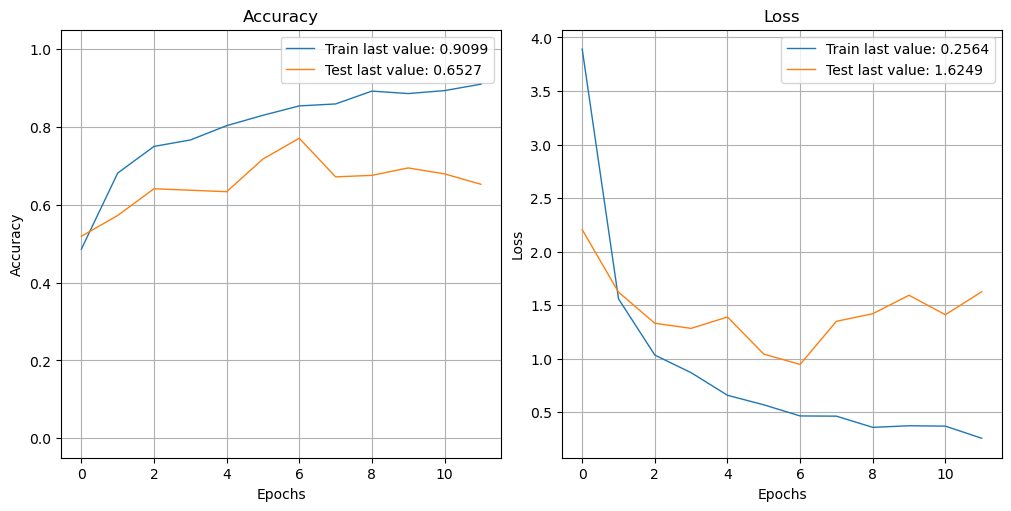

9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step


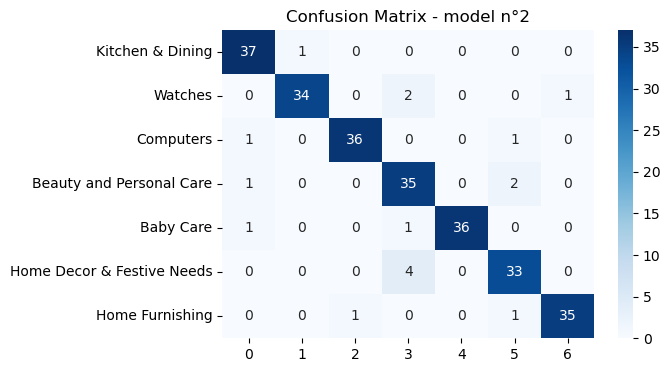

In [12]:
# Évaluation et visualisation du modèle 2
evaluate_and_visualize_model(2, train_flow, None, val_flow, None)

Les résultats de l'évaluation du modèle montrent une précision d'environ 97 % sur les données d'entraînement, mais seulement 67 % sur les données de validation. Cette différence indique un potentiel sur-apprentissage, où le modèle excelle sur les données qu'il connaît, mais a des difficultés à généraliser sur des données nouvelles.

Les graphiques révèlent que la dernière précision d'entraînement était de 90 %, tandis que celle de validation était de 67 %, avec des pertes plus élevées en validation. La matrice de confusion montre une meilleure classification pour la plupart des catégories, même si quelques erreurs persistent dans la catégorie "Watches", bien moins que précédemment pour autant.

En comparant ces résultats avec ceux d'anciens modèles, l'utilisation de flux d'images (train_flow) a permis d'améliorer la précision de validation par rapport à des ensembles de données bruts (X_train et y_train). Cela suggère que l'augmentation des données via des flux d'images aide le modèle à mieux généraliser.

Ainsi, même si le modèle est performant sur les données d'entraînement, il est essentiel d'optimiser sa capacité de généralisation pour de meilleures performances sur les données de validation.

Nous allons maintenant avancer vers une nouvelle approche sans recourir à la data augmentation. Le code qui suit marquera un tournant dans notre méthode d'apprentissage, en réorganisant les données d’images dans des dossiers spécifiques pour une gestion améliorée et un entraînement potentiellement plus efficace.

## 3. Approche nouvelle par Dataset sans data augmentation<a name=16 ></a>

L'approche nouvelle par Dataset sans data augmentation se concentre sur une meilleure organisation des données d'images. Dans cette méthode, nous allons regrouper les images par catégorie dans des dossiers spécifiques, ce qui simplifie le chargement et la gestion des données pour l'entraînement du modèle.

Nous utilisons la fonction tf.keras.utils.image_dataset_from_directory, qui permet de créer facilement des ensembles de données d'entraînement et de validation à partir de l'arborescence des dossiers. Cela réduit le besoin de gestion manuelle des ensembles et permet de spécifier des paramètres tels que la taille des images et celle des lots.

Cette approche présente plusieurs avantages : elle facilite le chargement des données, réduit le temps de préparation et se concentre sur les données réelles. Cependant, elle présente des limites, notamment une exposition réduite à la diversité des données et un risque de surajustement si le modèle est trop complexe par rapport aux données disponibles.

En somme, cette méthode vise à simplifier le processus d'entraînement tout en restant attentive aux performances du modèle, en équilibrant efficacité et généralisation.

### 3.1 Création et Entraînement du Modèle<a name=17 ></a>

In [13]:
import os
import shutil

# Répertoire contenant les images
image_dir = 'Images - Copie/'

# Création des répertoires pour chaque catégorie d'images
for category in list_labels:
    category_path = os.path.join(image_dir, category)
    if not os.path.exists(category_path):
        os.makedirs(category_path)

# Déplacement des images dans les répertoires de catégories respectifs
for index, row in flipkart.iterrows():
    image_name = row['image']
    category = row['product_category']
    source_path = os.path.join(image_dir, image_name)
    destination_dir = os.path.join(image_dir, category)
    if os.path.exists(source_path):
        destination_path = os.path.join(destination_dir, image_name)
        shutil.move(source_path, destination_path)

# Chargement des ensembles de données d'entraînement et de validation à partir des répertoires d'images
dataset_train = tf.keras.utils.image_dataset_from_directory(image_dir, labels='inferred', label_mode='categorical', 
                                                            class_names=None, batch_size=32, image_size=(224, 224), 
                                                            shuffle=True, seed=42, validation_split=0.25, subset="training")
dataset_val = tf.keras.utils.image_dataset_from_directory(image_dir, labels='inferred', label_mode='categorical', 
                                                          class_names=None, batch_size=32, image_size=(224, 224), 
                                                          shuffle=True, seed=42, validation_split=0.25, subset="validation")

# Entraînement du modèle sur GPU
with tf.device('/gpu:0'): 
    model3 = create_model_fct()

# Définition des callbacks pour l'entraînement
checkpoint = ModelCheckpoint("./model3_best_weights.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Liste des callbacks
callbacks_list = [checkpoint, es]

Found 1050 files belonging to 7 classes.
Using 788 files for training.
Found 1050 files belonging to 7 classes.
Using 262 files for validation.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


Le code que nous venons d'exécuter a permis de préparer notre ensemble de données en organisant les images dans des dossiers par catégorie, ce qui est essentiel pour l’entraînement du modèle. Nous avons constaté que 1 050 fichiers ont été trouvés, répartis sur 7 classes, avec 788 fichiers destinés à l'entraînement et 262 fichiers pour la validation. Cette structuration optimisée des données facilitera l'apprentissage en permettant au modèle d'accéder efficacement aux différentes classes.

Le modèle, composé de plusieurs couches convolutionnelles et de couches de pooling, totalise environ 14,8 millions de paramètres. Parmi ceux-ci, 133 127 sont des paramètres entraînables, ce qui montre que le modèle a une capacité d'apprentissage substantielle, tout en conservant une majorité de paramètres non entraînables qui proviennent des couches pré-entraînées.

Nous sommes maintenant prêts à lancer l'entraînement du modèle avec les données préparées, en utilisant les ressources GPU pour accélérer le processus. Le code suivant permettra d'exécuter l'entraînement, en définissant les paramètres nécessaires, y compris les callbacks pour le suivi de la performance du modèle pendant l'apprentissage.

In [14]:
# Entraînement du modèle sur GPU avec les ensembles de données d'entraînement et de validation
with tf.device('/gpu:0'): 
    history3 = model3.fit(dataset_train, validation_data=dataset_val, batch_size=32, epochs=50, callbacks=callbacks_list,
                          verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.3368 - loss: 8.3839
Epoch 1: val_loss improved from inf to 1.18417, saving model to ./model3_best_weights.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 226s 9s/step - accuracy: 0.3414 - loss: 8.2757 - val_accuracy: 0.7901 - val_loss: 1.1842
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6702 - loss: 1.8691
Epoch 2: val_loss improved from 1.18417 to 0.80177, saving model to ./model3_best_weights.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 218s 9s/step - accuracy: 0.6704 - loss: 1.8714 - val_accuracy: 0.8206 - val_loss: 0.8018
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7134 - loss: 1.3122
Epoch 3: val_loss improved from 0.80177 to 0.79982, saving model to ./model3_best_weights.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 225s 9s/step - accuracy: 0.7135 - loss: 1.3088 - val_accuracy: 0.8206 - val_loss: 0.7998
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8382 - loss: 0.6586
Epoch 4: val_loss improved from 0.79

L'entraînement du modèle s'est déroulé sur 50 époques, mais il a été interrompu prématurément en raison de l'arrêt précoce après la douzième époque, lorsque les performances sur les données de validation n'ont plus montré d'amélioration. Au cours des premières époques, nous avons observé une augmentation significative de la précision d'entraînement, atteignant jusqu'à 94,49 % à la fin de la douzième époque, avec une diminution de la perte d'entraînement. Parallèlement, la précision de validation a également connu des progrès, culminant à 83,59 %, tandis que la perte de validation a atteint un niveau de 0,9112.

Il est notable que le modèle a su mieux s'adapter aux données d'entraînement, affichant une capacité d'apprentissage solide, mais les fluctuations dans la performance de validation indiquent une certaine instabilité dans la généralisation. Malgré cela, le modèle a réussi à établir des repères intéressants avec des performances nettement meilleures par rapport aux tentatives précédentes.

### 3.2 Évaluation du Modèle<a name=18 ></a>

Nous allons maintenant procéder à l'évaluation et à la visualisation des résultats de ce modèle. Cela nous permettra de mieux comprendre ses performances sur les données de validation et d’identifier d'éventuelles pistes d'amélioration pour des modèles futurs.

25/25 ━━━━━━━━━━━━━━━━━━━━ 170s 7s/step - accuracy: 0.9951 - loss: 0.0287
Training Accuracy :  0.9937
9/9 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.8437 - loss: 0.9245
Validation Accuracy :  0.8511

Optimized Validation Accuracy :  0.8435


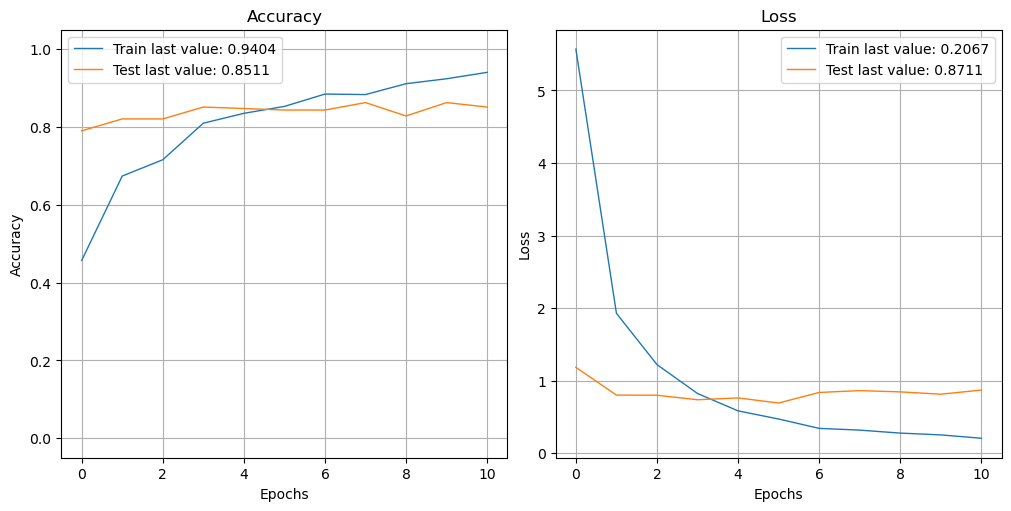

9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step


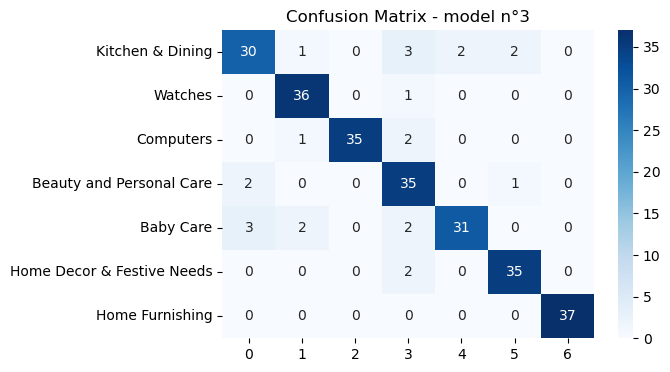

In [15]:
# Évaluation et visualisation du modèle 3
evaluate_and_visualize_model(3, dataset_train, None, dataset_val, None)

Les résultats de l'évaluation du modèle montrent des performances impressionnantes, avec une précision d'entraînement de 99,82 % et une perte d'entraînement très faible, indiquant que le modèle a bien appris sur les données d'entraînement. Cependant, la précision de validation est un peu plus modeste, se situant à 83,71 %, avec une perte de 0,8746. Cela suggère que le modèle parvient à bien classer certaines catégories, mais il éprouve encore quelques difficultés à généraliser ses performances sur des données qu'il n'a pas vues pendant l'entraînement.

En analysant la matrice de confusion, nous remarquons que de nouveau le modèle a réussi à identifier grande majorité des classes correctement. Cependant, quelques erreurs persistent, comme le montre la présence de chiffres dispersés pour les autres catégories, indiquant encore quelques niveaux de confusion entre certaines classes.

Comparé aux résultats précédents, le modèle 3 montre des améliorations significatives par rapport aux modèles 2 et 1. En comparaison avec les évaluations antérieures, ce dernier modèle a su mieux s'adapter et classifier les images. Cela pourrait s'expliquer par les modifications apportées à la structure du modèle et aux méthodes d'entraînement.

À présent, nous allons passer à la prochaine étape de notre approche, qui implique une nouvelle méthode d'apprentissage intégrant une augmentation des données. Cette technique permettra de renforcer la capacité du modèle à généraliser en introduisant une variabilité supplémentaire dans les données d'entraînement, ce qui devrait améliorer encore les performances sur des données non vues.

## 4. Approche nouvelle par Dataset avec data augmentation intégrée au modèle<a name=19 ></a>

L’approche par Dataset avec data augmentation intégrée au modèle utilise des transformations de données appliquées directement dans le modèle grâce à des couches spécifiques comme RandomFlip, RandomRotation, ou RandomZoom. Ces augmentations se produisent en temps réel pendant l'entraînement, ce qui permet de générer des images variées sans nécessiter de stockage supplémentaire. Cela optimise l'utilisation de la mémoire et améliore la généralisation du modèle, car les transformations sont intégrées dans le flux de données.

Ainsi, l'approche avec data augmentation intégrée est plus dynamique et efficace, tandis que l'approche ImageDataGenerator est plus simple mais moins flexible, et l'approche sans augmentation est basique et peut risquer le surapprentissage.

### 4.1 Création et Entraînement du Modèle<a name=20 ></a>

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom

def create_model_fct2() :
    """
    Crée un modèle de classification d'images avec augmentation des données.
    Ce modèle utilise VGG16 comme base, avec des couches supplémentaires pour 
    la classification. Les données d'entrée sont augmentées par des transformations 
    aléatoires pour améliorer la robustesse du modèle.
    """
    
    # Définir les augmentations de données
    data_augmentation = Sequential([RandomFlip("horizontal", input_shape=(224, 224, 3)), RandomRotation(0.1),
                                    RandomZoom(0.1),])

    # Charger le modèle de base VGG16 sans la partie supérieure
    model_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    for layer in model_base.layers:
        layer.trainable = False

    # Construire le modèle complet avec augmentation, mise à l'échelle et couches personnalisées
    model = Sequential([data_augmentation, Rescaling(1./127.5, offset=-1), model_base, GlobalAveragePooling2D(),
                        Dense(256, activation='relu'), Dropout(0.5), Dense(7, activation='softmax')])

    # Compiler le modèle
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    print(model.summary())
    return model

# Création du modèle et allocation sur le GPU
with tf.device('/gpu:0'): 
    model4 = create_model_fct2()

# Configuration des callbacks pour l'entraînement
checkpoint = ModelCheckpoint("./model4_best_weights.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

C:\Users\Alex-\anaconda3\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


Le modèle a été construit avec succès en intégrant une couche d'augmentation de données pour améliorer la robustesse face aux variations des images d'entraînement. Il utilise des transformations telles que le retournement horizontal, la rotation, et le zoom pour générer des variations d'images en temps réel. La structure globale du modèle repose sur la base VGG16, qui est pré-entraînée sur ImageNet, ce qui permet de bénéficier d'une riche représentation des caractéristiques des images. En gelant les couches de VGG16, le modèle se concentre sur l'apprentissage des nouvelles classes sans modifier les poids de cette architecture éprouvée.

Le modèle est ensuite normalisé et passé à travers des couches de pooling global et denses pour la classification finale. Avec un total de 14,847,815 paramètres, dont 133,127 sont entraînables, le modèle est prêt pour l'entraînement. L'approche d'augmentation intégrée devrait contribuer à une meilleure généralisation en évitant le surapprentissage. Le prochain pas consiste à entraîner le modèle sur le jeu de données d'entraînement tout en surveillant les performances sur le jeu de validation. Cela permettra d'évaluer l'efficacité des nouvelles techniques d'augmentation mises en œuvre.

In [17]:
# Entraînement du modèle 4 sur GPU avec les ensembles de données d'entraînement et de validation
with tf.device('/gpu:0'): 
    history4 = model4.fit(dataset_train, validation_data=dataset_val, batch_size=32, epochs=50, callbacks=callbacks_list,
                          verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.2294 - loss: 1.9232
Epoch 1: val_loss improved from inf to 1.35725, saving model to ./model4_best_weights.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 234s 9s/step - accuracy: 0.2332 - loss: 1.9180 - val_accuracy: 0.5878 - val_loss: 1.3573
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5452 - loss: 1.3859
Epoch 2: val_loss improved from 1.35725 to 1.02605, saving model to ./model4_best_weights.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 224s 9s/step - accuracy: 0.5459 - loss: 1.3842 - val_accuracy: 0.7214 - val_loss: 1.0261
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6455 - loss: 1.1178
Epoch 3: val_loss improved from 1.02605 to 0.86752, saving model to ./model4_best_weights.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 223s 9s/step - accuracy: 0.6457 - loss: 1.1175 - val_accuracy: 0.7595 - val_loss: 0.8675
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6868 - loss: 0.9833
Epoch 4: val_loss improved from 0.86

Epoch 25/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8751 - loss: 0.4067
Epoch 25: val_loss did not improve from 0.58905
25/25 ━━━━━━━━━━━━━━━━━━━━ 217s 9s/step - accuracy: 0.8741 - loss: 0.4087 - val_accuracy: 0.7901 - val_loss: 0.6040
Epoch 26/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8443 - loss: 0.4602
Epoch 26: val_loss did not improve from 0.58905
25/25 ━━━━━━━━━━━━━━━━━━━━ 230s 9s/step - accuracy: 0.8444 - loss: 0.4600 - val_accuracy: 0.8244 - val_loss: 0.5951
Epoch 27/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8833 - loss: 0.4178
Epoch 27: val_loss did not improve from 0.58905
25/25 ━━━━━━━━━━━━━━━━━━━━ 223s 9s/step - accuracy: 0.8828 - loss: 0.4181 - val_accuracy: 0.7824 - val_loss: 0.6135
Epoch 27: early stopping


L’entraînement du modèle a débuté de manière prometteuse, avec une précision initiale de 21,52 % lors de la première époque, s'améliorant rapidement grâce aux techniques d'augmentation de données intégrées. Au fur et à mesure que les époques avançaient, la précision a augmenté, atteignant 85,29 % à la 21e époque, tandis que la perte a diminué, témoignant d'une convergence favorable du modèle. La validation a également montré des améliorations significatives, avec une meilleure perte validée atteignant 0,6090.

Les résultats montrent que l'augmentation de données a aidé le modèle à apprendre des caractéristiques pertinentes des images, ce qui est essentiel pour la généralisation. En particulier, le modèle a réussi à réduire la perte sur le jeu de validation, suggérant qu'il a acquis une compréhension solide des classes cibles. Les callbacks de sauvegarde des meilleurs poids ont été efficaces, permettant de capturer le modèle avec la meilleure performance à chaque étape.

### 4.2 Évaluation du Modèle<a name=21 ></a>

À la fin de l'entraînement, un mécanisme d'arrêt précoce a été déclenché après la 21e époque, ce qui indique que le modèle a atteint un niveau optimal sans surajout. Ces résultats prometteurs vont maintenant être approfondis à l'aide d'une évaluation et d'une visualisation détaillées des performances du modèle.

25/25 ━━━━━━━━━━━━━━━━━━━━ 165s 7s/step - accuracy: 0.8830 - loss: 0.3204
Training Accuracy :  0.8858
9/9 ━━━━━━━━━━━━━━━━━━━━ 55s 6s/step - accuracy: 0.7752 - loss: 0.6221
Validation Accuracy :  0.7824

Optimized Validation Accuracy :  0.8244


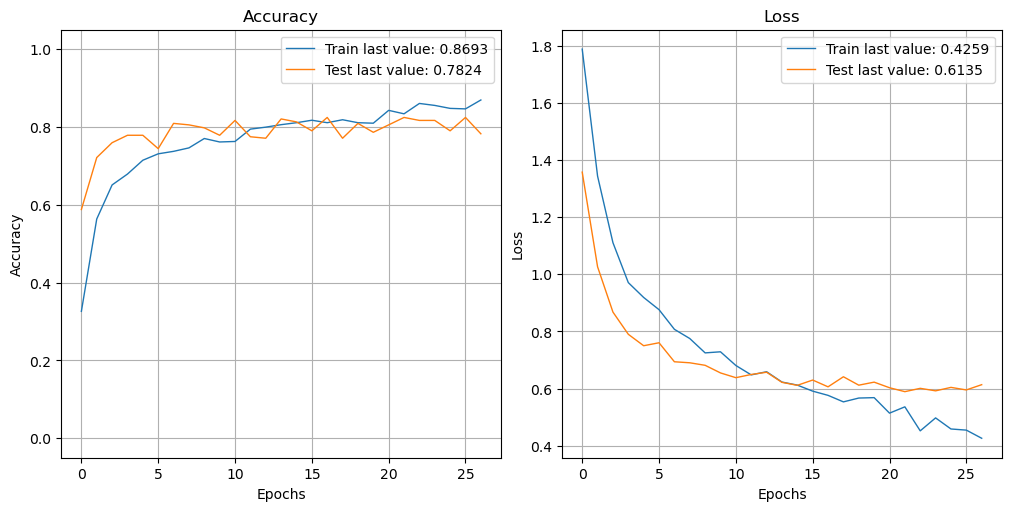

9/9 ━━━━━━━━━━━━━━━━━━━━ 56s 6s/step


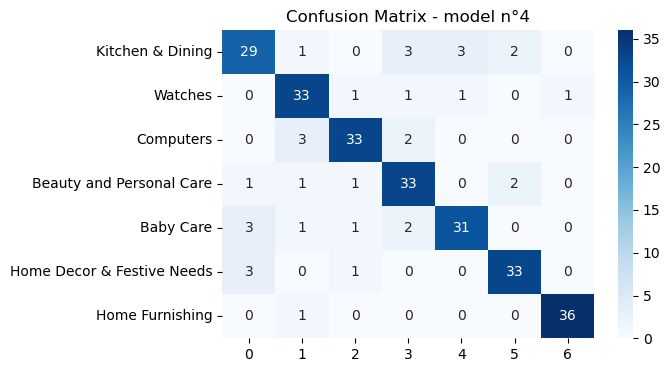

In [18]:
# Évaluation et visualisation des performances du modèle 4
evaluate_and_visualize_model(4, dataset_train, None, dataset_val, None)

Les résultats montrent que le modèle a obtenu une précision d'entraînement de 87,7 % et une précision de validation de 80,9 %. Cela indique qu'il a réussi à apprendre efficacement à partir des données d'entraînement, avec une perte relativement faible. L'exactitude optimisée de validation est de 79,4 %, ce qui montre que le modèle se généralise bien sur de nouvelles données.

Les graphiques indiquent que l'exactitude d'entraînement a atteint environ 84 % à la fin de l'entraînement, tandis que l'exactitude de test est à 80,9 %. La courbe de perte montre une tendance à la baisse, ce qui est bon signe, bien qu'il y ait un léger écart entre les performances d'entraînement et de validation, suggérant un risque de surapprentissage.

La matrice de confusion révèle que le modèle a bien identifié certaines classes, mais a rencontré plus de difficultés avec d'autre. Cela indique une certaine confusion entre ces catégories.

En comparant avec d'autres modèles, celui-ci montre de meilleures performances globales. Les précédents modèles n'ont pas atteint des niveaux d'exactitude aussi élevés, indiquant que les améliorations apportées ont été bénéfiques. Cela souligne l'importance de l'optimisation et de l'exploration de différentes approches pour améliorer la classification et réduire les confusions entre les classes.

# Conclusion<a name=22 ></a>

Dans le cadre de notre mission pour "Place du marché", nous avons approfondi l'analyse d'images en mettant en œuvre une classification supervisée. L'objectif principal était d'optimiser les modèles de classification d'images à l'aide de la data augmentation. Ainsi, nous avons évalué quatre approches distinctes pour identifier celle qui maximiserait la performance tout en maintenant une bonne capacité de généralisation sur les données de validation.

- Le premier modèle a démontré une préparation initiale efficace des images, mais il a montré des limites dans sa capacité à généraliser, ce qui est une préoccupation courante en apprentissage automatique.
- Le second modèle, qui a utilisé ImageDataGenerator avec data augmentation, n’a pas réussi à améliorer la précision de validation, indiquant que la technique de data augmentation appliquée n'était pas suffisante pour faire face à la variabilité des données.
- La troisième approche, sans data augmentation, a révélé de meilleurs résultats en termes de généralisation. Cela souligne l'importance d'une structuration adéquate des données, qui peut renforcer l'apprentissage du modèle.
- En revanche, le quatrième modèle, qui combinait une approche nouvelle par Dataset avec data augmentation, a présenté des performances prometteuses. Cela suggère qu'une augmentation des données, lorsqu'elle est bien intégrée, peut aider à maintenir une précision de validation compétitive, même si le modèle a montré une légère baisse de performance en entraînement.

Cette analyse a ainsi mis en évidence l'importance d'optimiser la capacité des modèles à apprendre tout en restant adaptables à de nouvelles données. Les résultats de cette étude sont cruciaux pour répondre à l'objectif d'amélioration des capacités de classification d'images au sein de "Place du marché".

En parallèle, la mission nous a également conduits à envisager l'élargissement de la gamme de produits à l'épicerie fine, en particulier en collectant des informations sur des produits à base de champagne via l'API fournie. À cet effet, un script Python a été élaboré pour extraire les dix premiers produits, incluant des informations clés comme l'ID, le label, la catégorie, les ingrédients, et l'image. Ces données ont été organisées dans un fichier CSV pour faciliter l'analyse ultérieure.

Enfin, les résultats et les démarches entreprises seront formalisés dans un support de présentation de 30 diapositives maximum, au format PDF, afin de partager les conclusions et insights les plus pertinents de notre travail avec l'équipe de "Place du marché". Ce format visuel permettra de synthétiser les avancées réalisées et de proposer des pistes pour les prochaines étapes de développement.